# Código

### Judith Urbina Córdoba
### PEC3 Visualización de Datos

In [47]:
from IPython.display import IFrame

# URL de la página del Quijote
url = "https://coleccionesdigitales.cervantes.es/digital/collection/quijote/search"

In [38]:
import folium
import pandas as pd

# Crear el mapa vacío
m = folium.Map(location=[20,0], tiles="OpenStreetMap", zoom_start=2)

# Datos proporcionados
data = pd.DataFrame({
    'lon': [
        9.19, 18.0686, 4.9041, 2.1734, 20.4489, 19.0402, 6.7735, 8.5417, 14.5058,
        -0.1276, 10.75, 2.3522, -46.6333, 24.7535, 139.6917, 25.2799, 15.9819, 
        -0.8877, 31.2357, -3.6934, 23.7275, 100.5018, -58.3816, 36.2765, 36.2765, 
        -6.2603, 35.2332, 24.9426, 34.8516, 28.9784, 12.5683, 19.9449, -8.6764, 
        -9.1393, 77.2910, 14.3754, 120.9842, 9.19, 37.6173, 118.7969, -74.006, 
        77.209, -1.2577, 24.8692, -8.611, 14.4378, 14.4378, -21.8174, 24.1052, 
        126.9780, 23.3219, 13.1216, 44.7866, 44.7866, 43.7, 41.9028, 76.2915, 
        79.922, 21.0122, -1.9574, 8.5417
    ],
    'lat': [
        45.4642, 59.3293, 52.3676, 41.3851, 44.8176, 47.4979, 51.2277, 47.3769, 46.0569, 
        51.5074, 59.95, 48.8566, -23.5505, 59.4370, 35.6895, 54.6872, 45.8150, 41.6488, 
        30.0444, 40.4818, 37.9838, 13.7563, -34.6037, 33.5138, 33.5138, 53.3498, 33.8547, 
        60.1695, 31.0461, 41.0082, 55.6761, 50.0647, 43.1115, 38.7167, 28.6885, 35.9375, 
        14.5995, 45.4642, 55.7558, 32.0603, 40.7128, 28.6139, 51.7520, 44.8567, 41.1579, 
        50.0755, 50.0755, 64.1355, 56.9496, 37.5665, 42.6977, 59.3293, 41.6941, 35.6892, 
        41.3275, 30.8643, 45.0678, 8.5241, 21.0278, 52.2297, 43.2849
    ],
    'name': [
        'Milán', 'Estocolmo', 'Ámsterdam', 'Barcelona', 'Belgrado', 'Budapest', 'Düsseldorf', 'Zúrich', 'Liubliana', 
        'Londres', 'Oslo', 'París', 'São Paulo', 'Tallin', 'Tokio', 'Vilnius', 'Zagreb', 'Zaragoza', 
        'El Cairo', 'Alcalá de Henares', 'Atenas', 'Bangkok', 'Buenos Aires', 'Damasco', 'Dimashq', 
        'Dublín', 'El Líbano', 'Helsinki', 'Israel', 'Estambul', 'Copenhague', 'Cracovia', 'Laracha (La Coruña)', 
        'Lisboa', 'Nueva Delhi', 'Malta', 'Manila', 'Milán', 'Moscú', 'Nankín', 'Nueva York', 
        'Nueva Delhi', 'Oxford', 'Bucarest', 'Oporto', 'Praga', 'Praga', 'Reykjavík', 'Riga', 
        'Seúl', 'Sofía', 'Estocolmo-Stehag', 'Tbilisi', 'Teherán', 'Tirana', 'Zhejiang', 'Turín', 
        'Trivandrum', 'Viet Hung', 'Varsovia', 'Zarautz'
    ]
})

# Añadir marcadores uno por uno en el mapa
for i in range(len(data)):
    folium.Marker(
        location=[data.iloc[i]['lat'], data.iloc[i]['lon']],
        popup=data.iloc[i]['name']
    ).add_to(m)
m.save('localiz.html')

In [27]:
import pandas as pd
import plotly.express as px

# Datos proporcionados
df = pd.DataFrame({
    'n_ediciones': [
        5, 4, 4, 4, 4, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1
    ],
    'lenguas': [
        "Italiano", "Árabe", "Inglés", "Portugués", "Sueco", "Alemán", "Catalán", "Checo", "Chino", "Croata", "Danés", "Esloveno", "Estonio", "Francés", "Hindi", "Holandés", "Húngaro", "Japonés", "Lituano", "Noruego", "Polaco", "Serbio", "Albanés", "Búlgaro", "Coreano", "Español", "Esperanto", "Euskera", "Finés", "Gaélico", "Gallego", "Georgiano", "Griego", "Hebreo", "Islandés", "Latín clásico", "Letón", "Malayalam", "Maltés", "Persa", "Rumano", "Ruso", "Tagalo", "Tailandés", "Turco", "Vietnamita", "Yidis"
    ]
})

# Crear el treemap
fig2 = px.treemap(df, path=['lenguas'], values='n_ediciones',
                 color='n_ediciones', color_continuous_scale='Blues')

# Eliminar ejes y ajustar el texto
fig2.update_traces()
# Guardar como HTML
fig2.write_html('lenguas_frecuencia.html')

In [13]:
import pandas as pd
import plotly.express as px

# Función para dividir el texto en líneas después de cada 9 palabras
def split_text(text, n=6):
    words = text.split()
    return '<br>'.join([' '.join(words[i:i+n]) for i in range(0, len(words), n)])

# Datos
df = pd.DataFrame({
    "names": ['Lenguas', 'Euskera', 'Esperanto', 'Latín clásico', 'Gallego', 'Yídish',
              split_text('El euskera es la lengua viva más antigua de Europa. La mayoría de lingüistas, expertos e investigadores así lo afirman. El euskera es una lengua muy antigua cuyos orígenes aún se desconocen. Lingüistas e historiadores de renombre creen que puede ser descendiente directo de la lengua hablada por los habitantes de las cuevas de Altamira, Ekain o Lascaux.'),
              split_text('El esperanto es la lengua planificada internacional más difundida y hablada en el mundo.​ El nombre proviene del seudónimo que L. L. Zamenhof, un oftalmólogo polaco, utilizó para publicar las bases del idioma en 1887.'),
              split_text('Podemos considerar que el latín clásico es la lengua hablada por las clases cultas romanas desde aproximadamente el siglo II a.C. hasta aproximadamente el siglo II d.C.'),
              split_text('El gallego es un idioma romance derivado del latín mientras que el gaélico pertenece a la rama celta. La similitud de sus nombres es algo anecdótico, tienen tanto parecido como el inglés y las ingles.'),
              split_text('El yiddish es un idioma que alguna vez hablaron judíos en un área que se extendía desde Alsacia hasta los Urales, influenciado e influenciado por los idiomas y culturas locales. Estuvo a punto de extinguirse en el siglo XX, cuando perdió a la mayoría de sus hablantes, principalmente (pero no sólo) a través del Holocausto.'),
              split_text('https://www.bizkaiatalent.eus/en/pais-vasco-te-espera/senas-de-identidad/euskera-antigua-europa/#:~:text=Euskera%20is%20the%20oldest%20living,of%20Altamira%2C%20Ekain%20or%20Lascaux'),
              'https://es.wikipedia.org/wiki/Esperanto',
              'https://www.uv.es/ivorra/Latin/evolucion.htm',
              'https://es.quora.com/Se-parecen-el-idioma-ga%C3%A9lico-y-el-gallego#:~:text=El%20gallego%20es%20un%20idioma,el%20ingl%C3%A9s%20y%20las%20ingles',
              split_text('https://www.europarl.europa.eu/thinktank/en/document/EPRS_BRI(2022)698881#:~:text=Yiddish%20is%20a%20language%20once,not%20only%20%E2%80%93%20through%20the%20Holocaust')],
    "parents": ['', 'Lenguas', 'Lenguas', 'Lenguas', 'Lenguas', 'Lenguas',
               'Euskera', 'Esperanto', 'Latín clásico', 'Gallego', 'Yídish',
               'Euskera', 'Esperanto', 'Latín clásico', 'Gallego', 'Yídish']
})

In [14]:
# Crear el treemap
fig = px.treemap(df, names='names', parents='parents')

# Actualizar los trazos
fig.update_traces()

# Guardar como HTML
fig.write_html('lenguas_poco_comunes.html')

In [46]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Listado de palabras con sus frecuencias
text = (
    "Italiano " * 5 + "Árabe " * 4 + "Inglés " * 4 + "Portugués " * 4 + "Sueco " * 4 +
    "Alemán " * 3 + "Catalán " * 2 + "Checo " * 2 + "Chino " * 2 + "Croata " * 2 +
    "Danés " * 2 + "Esloveno " * 2 + "Estonio " * 2 + "Francés " * 2 + "Hindi " * 2 +
    "Holandés " * 2 + "Húngaro " * 2 + "Japonés " * 2 + "Lituano " * 2 + "Noruego " * 2 +
    "Polaco " * 2 + "Serbio " * 2 + "Albanés " + "Búlgaro " + "Coreano " + "Español " +
    "Esperanto " + "Euskera " + "Finés " + "Gaélico " + "Gallego " + "Georgiano " + 
    "Griego " + "Hebreo " + "Islandés " + "Latín clásico " + "Letón " + "Malayalam " + 
    "Maltés " + "Persa " + "Rumano " + "Ruso " + "Tagalo " + "Tailandés " + "Turco " + 
    "Vietnamita " + "Yidis "
)

# Cargar la imagen de la máscara
girl_mask = np.array(Image.open('silueta.jpg'))

# Crear el word cloud
wc = WordCloud(background_color="white", mask=girl_mask, contour_width=6, contour_color='steelblue')
wc.generate(text)
# Guardar el word cloud como archivo
wc.to_file('idiomas_wordclouds.png')
# Mostrar el word cloud

# Traducciones del Quijote:
# ¿Podemos afirmar que el Quijote es apreciado mundialmente y nacionalmente?

## Usaremos la colección del Instituto Cervantes

In [42]:
IFrame(url, width=800, height=600)

## ¿En qué lugares ha habido una publicación del Quijote?

In [39]:
m

## ¿En qué idiomas se ha hecho una edición del Quijote?

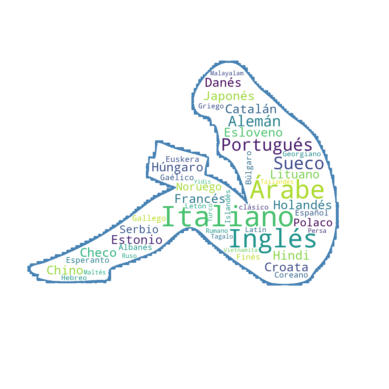

In [45]:
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

## ¿Cuántas ediciones tiene cada idioma?

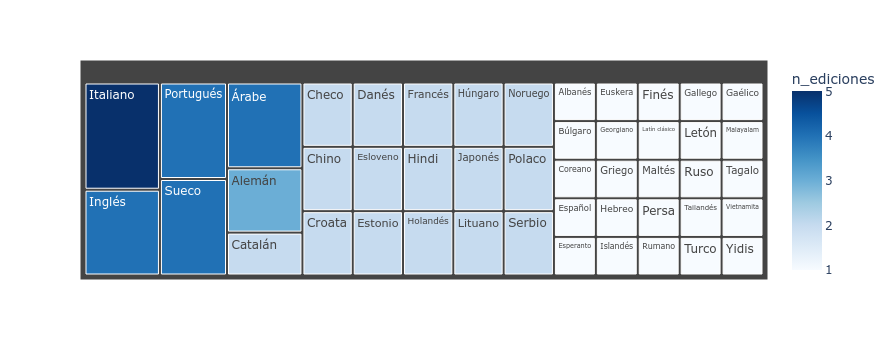

In [28]:
fig2.show()

## ¿Qué lenguas nos sorprenden?

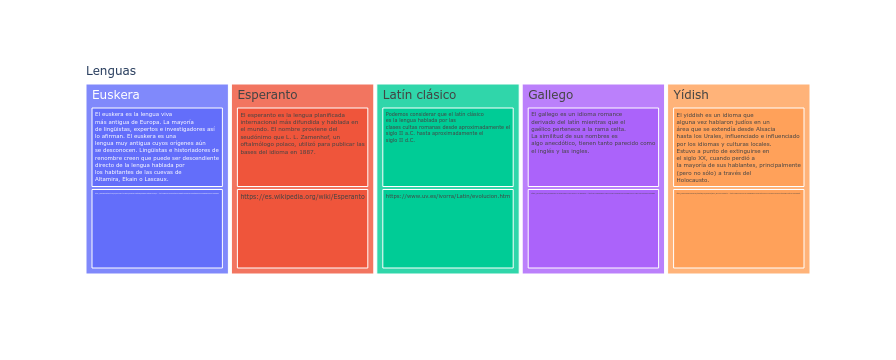

In [15]:
fig.show()

## ¿Cómo podríamos fomentar más el interés en la lectura del Quijote?

- ¡Creando interactivos!
- Haciendo más películas animadas y no animadas